In [158]:
#Importing required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Importing the data set and priliminary examination

In [2]:
#Importing the data set 

df_train = pd.read_csv('Insurance_train.csv')
df_test = pd.read_csv('Insurance_test.csv')

In [3]:
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
#Checking data shape
print(df_train.shape)
print(df_test.shape)


(58592, 44)
(39063, 43)


In [5]:
#one column is missing in the test data 

In [6]:
list_train_col = list(df_train.columns)
list_test_col = list(df_test.columns)
for i in list_train_col:
    if i not in list_test_col:
        print(i)

is_claim


In [7]:
#the dependent variable is missing in the test data
#So only train data is considering for the model building and performance evaluation
#For final prediction test data set can be used

In [8]:
#For better visibilty of data 

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [9]:
#Taking a copy of original data set

df = df_train.copy()

In [10]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
df.shape

(58592, 44)

In [12]:
#Checking the input data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [13]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [14]:
df.duplicated().sum()

0

In [15]:
print(f" Number of categorical features {df.select_dtypes(include = 'object').shape[1]}")
print(f" Number of numerical features {df.select_dtypes(exclude  = 'object').shape[1]}")

 Number of categorical features 28
 Number of numerical features 16


In [16]:
#Summary
#There are tolal 44 features in the input data and 58592 enties
#there is no missing values in the data
#there is no duplicate values in the data set
#Out of 44 there are  28 catagorical features and 16 numerical features

### Exploratory data analysis

In [17]:
#policy_id  has no impact on the claim and droping this from data set 
df = df.drop('policy_id',axis=1)

In [18]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [20]:
# Checking numerical and catagorical values seperatly 

In [21]:
df_numeric = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [22]:
for i in df_categorical.columns:
    print(f'******************************************{i}***********************************************')
    print(df_categorical[i].value_counts())
    print('\n')
    

******************************************area_cluster***********************************************
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64


******************************************segment***********************************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64


******************************************model***********************************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64


******************************************fuel_type*******************************

In [23]:
#From above analysis max_torque and max_power can be converted to numerical values by removing rpm and extracting exaclty rpm and bhp values 

In [24]:
df['max_power'] = df['max_power'].apply(lambda x : x.split('@')[0][:-3])
df['max_torque'] = df['max_torque'].apply(lambda x : x.split('@')[0][:-2])
df['max_power'] = df['max_power'].astype(float)
df['max_torque'] = df['max_torque'].astype(float)

In [25]:
df_numeric = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [26]:
for i in df_categorical.columns:
    print(f'******************************************{i}***********************************************')
    print(df_categorical[i].value_counts())
    print('\n')

******************************************area_cluster***********************************************
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64


******************************************segment***********************************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64


******************************************model***********************************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64


******************************************fuel_type*******************************

In [27]:
for i in df_numeric.columns:
    print(f'******************************************{i}***********************************************')
    print(df_numeric[i].value_counts())
    print('\n')

******************************************policy_tenure***********************************************
0.515874    1
1.011813    1
0.031010    1
0.272315    1
0.588006    1
           ..
1.153225    1
0.317849    1
1.128647    1
0.097815    1
0.124429    1
Name: policy_tenure, Length: 58592, dtype: int64


******************************************age_of_car***********************************************
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26      24
0.29      21
0.32      13
0.33      12
0.36       8
0.34       6
0.39       5
0.38       4
1.00       3
0.37       3
0.49       2
0.46       2
0.44       2
0.42       1
0.45       1
0.35   

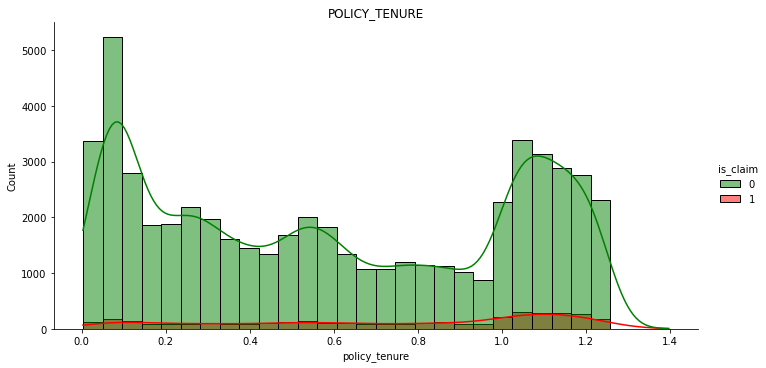

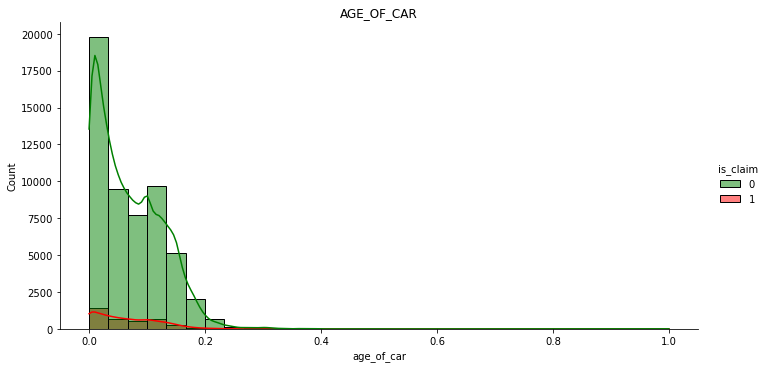

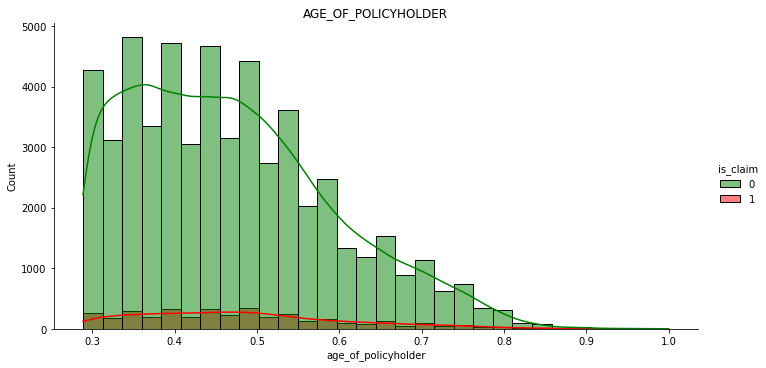

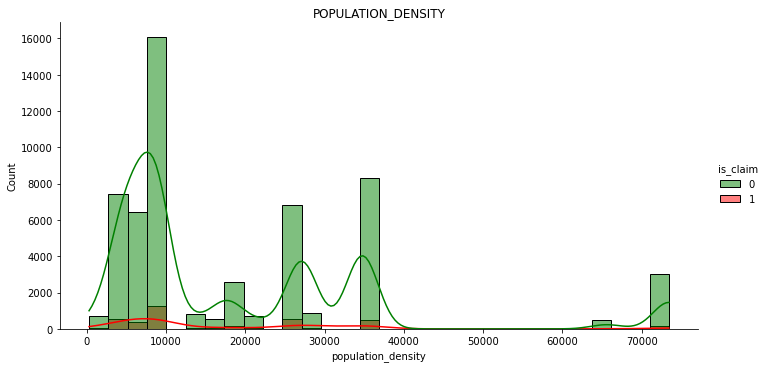

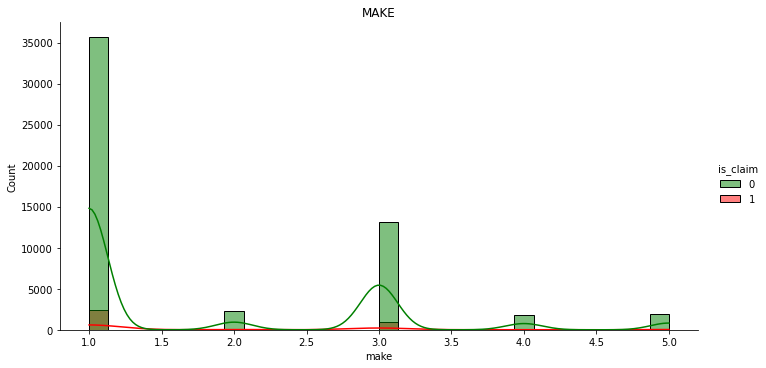

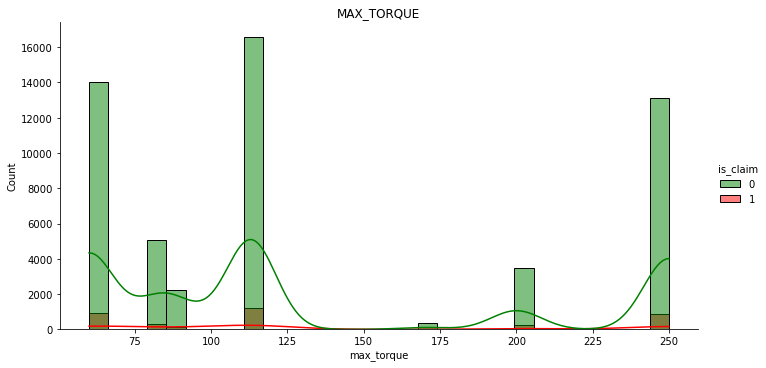

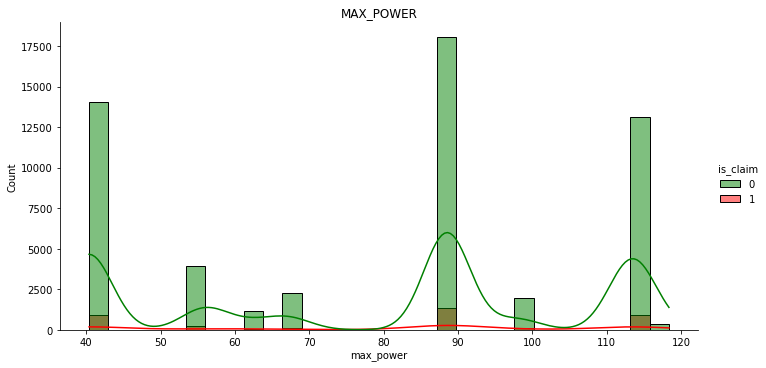

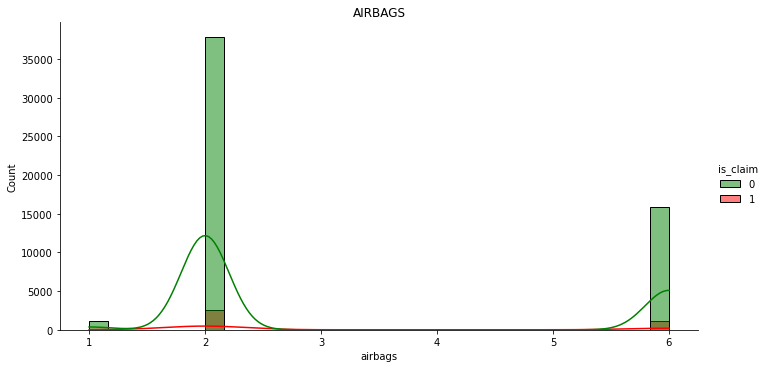

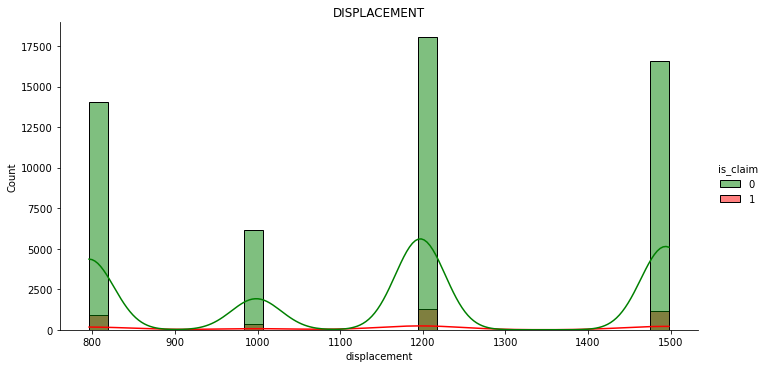

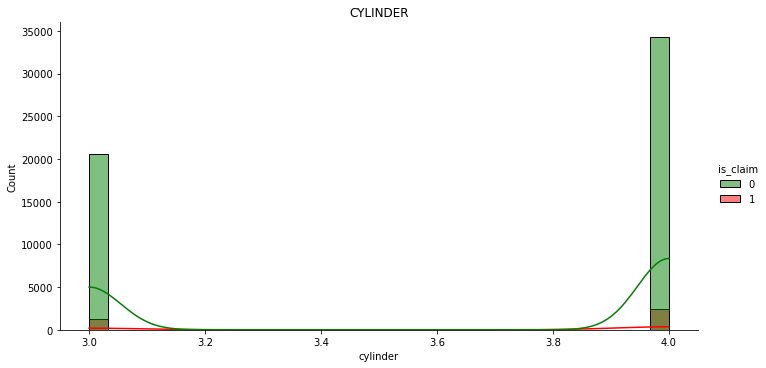

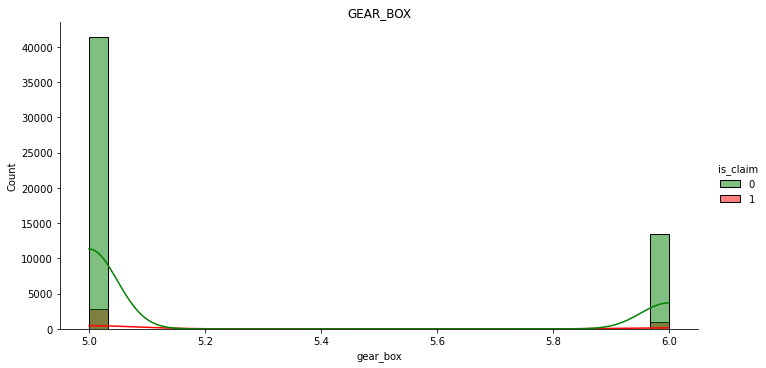

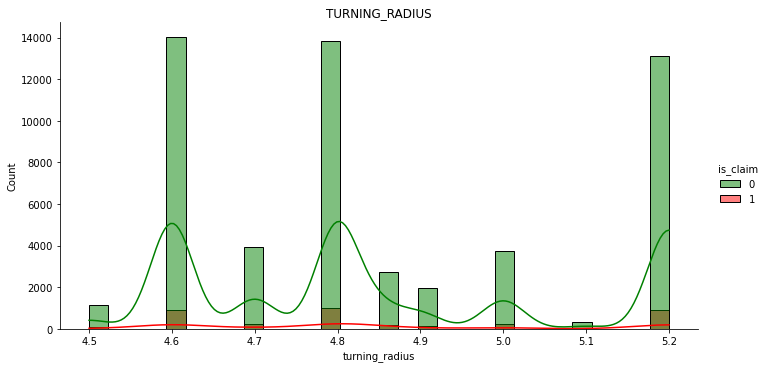

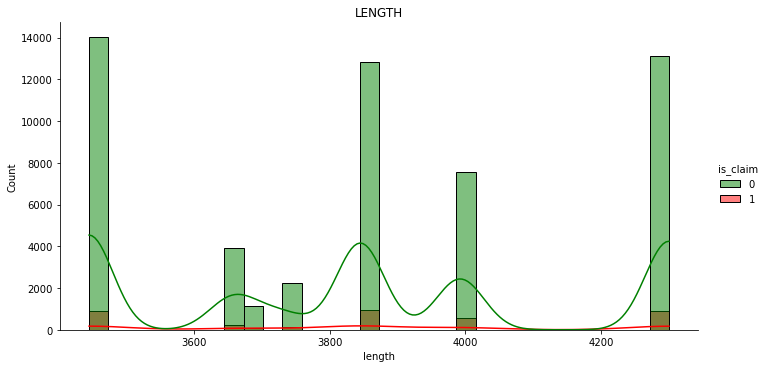

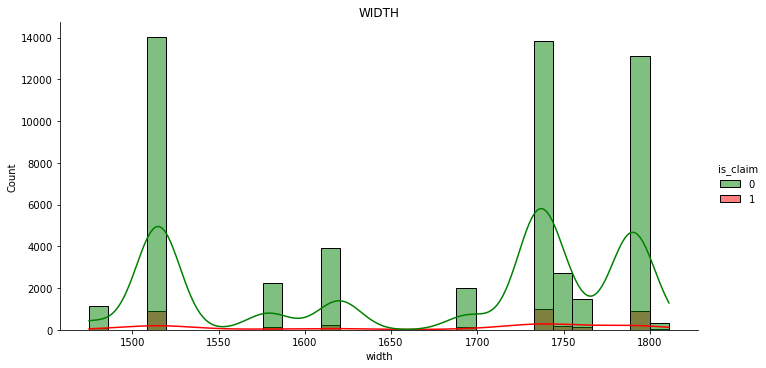

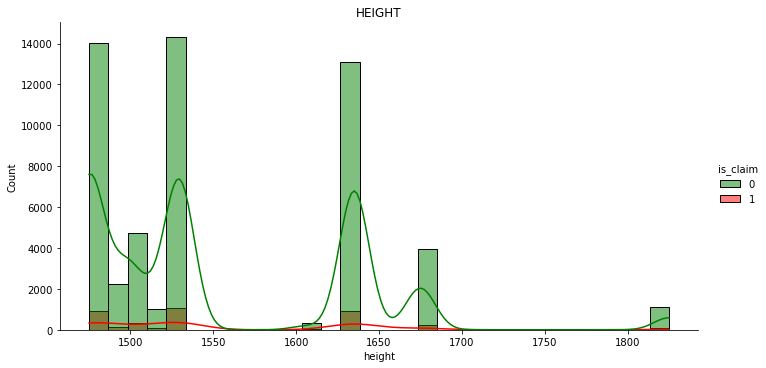

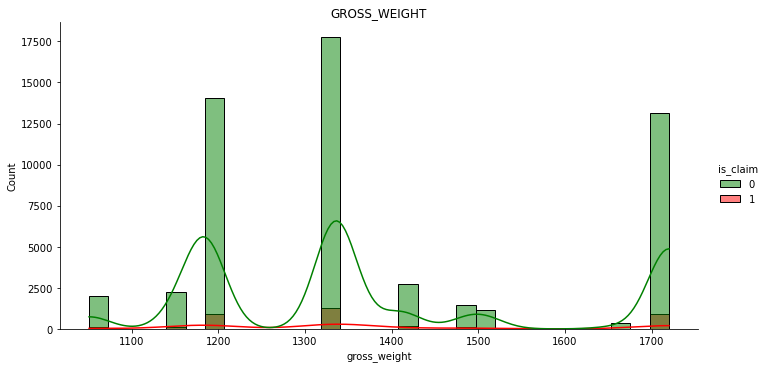

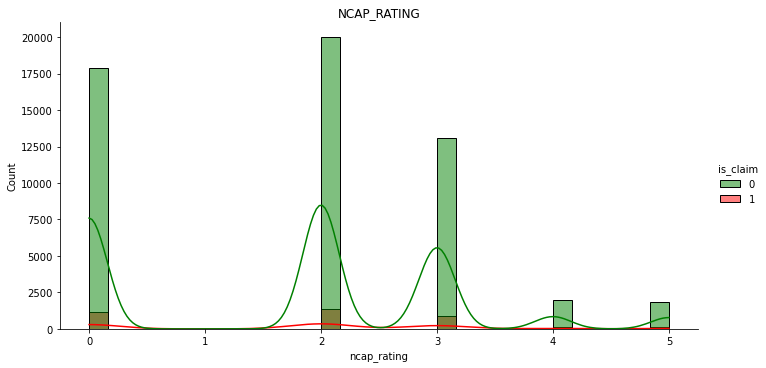

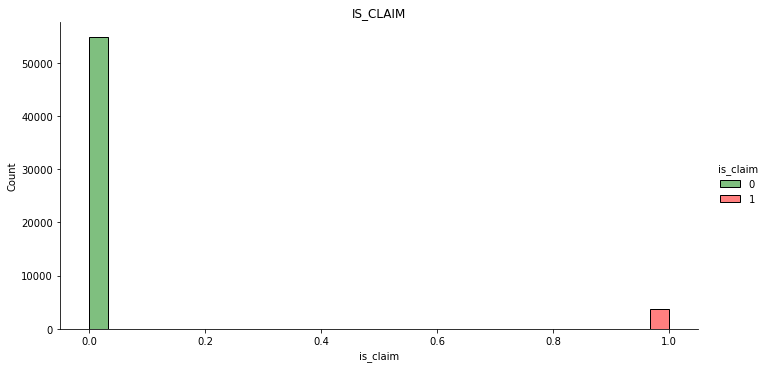

In [28]:
custom_palette = ["green","red"]
sns.set_palette(custom_palette)
for i in df_numeric.columns:
    sns.displot(data = df_numeric,x =df_numeric[i],kde=True,bins = 30,aspect=2,hue='is_claim')
    plt.title((i).upper())
    plt.show()

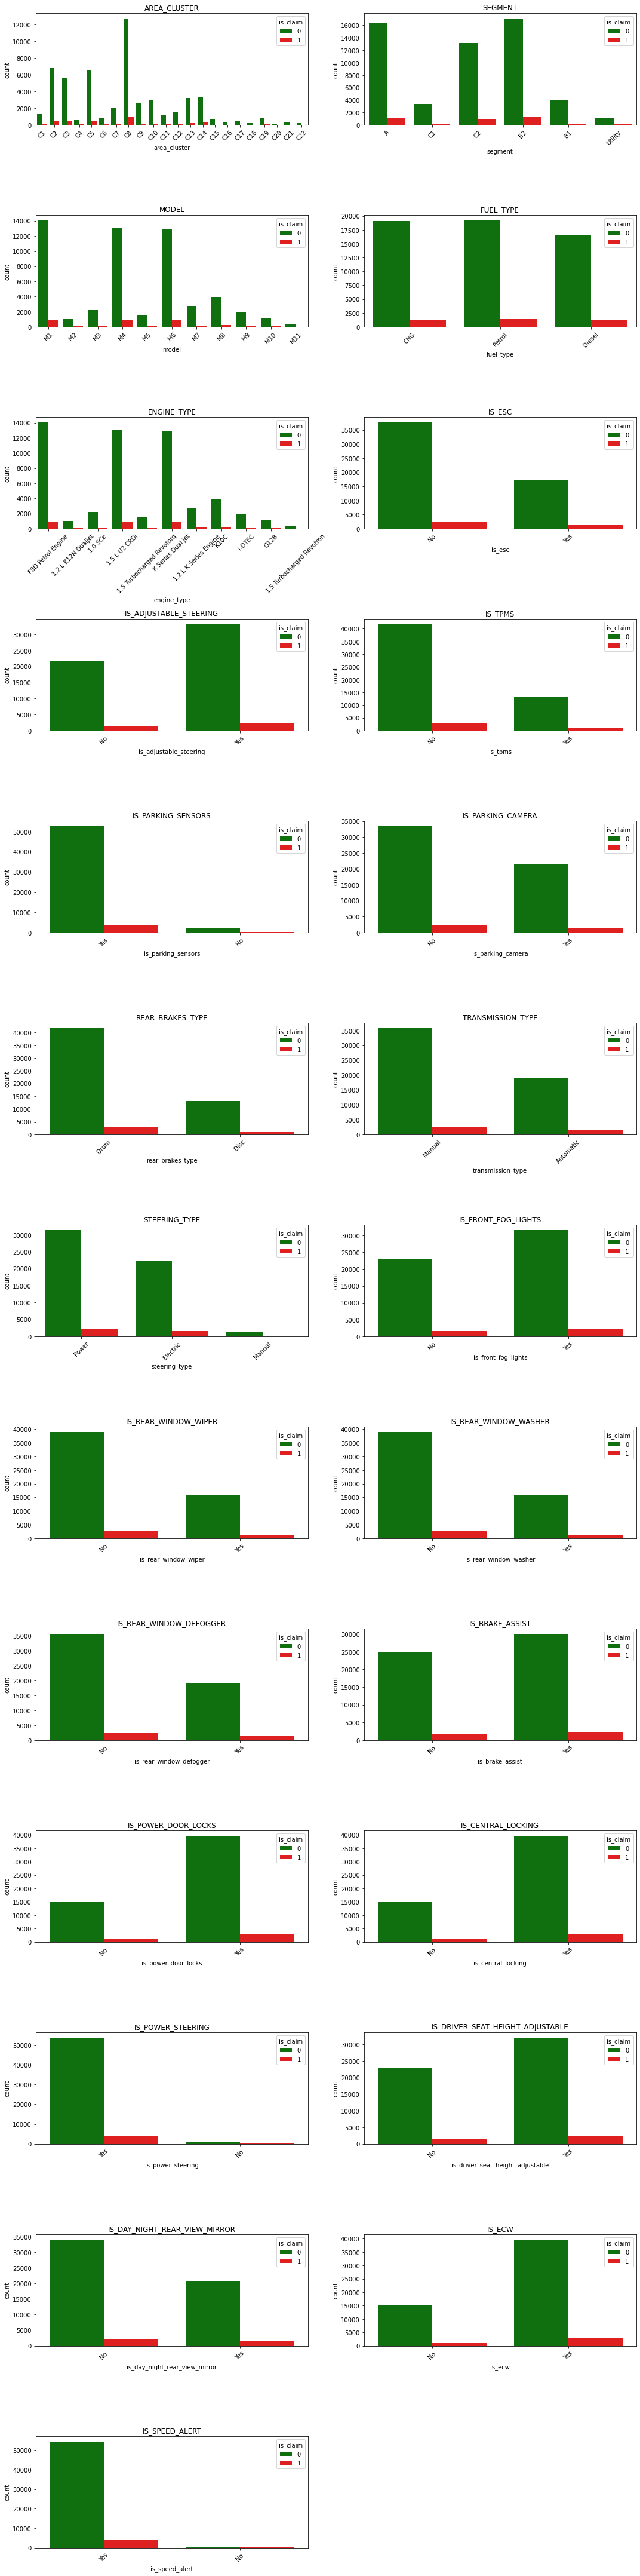

In [29]:
plt.figure(figsize=(15,60))
for i in range(len(df_categorical.columns)):
    plt.subplot(13,2,i+1)
    sns.countplot(data=df, x= df_categorical[df_categorical.columns[i]],hue='is_claim')
    plt.xticks(rotation =45)
    plt.title(df_categorical.columns[i].upper())
    plt.tight_layout()


In [30]:
df_categorical.head()

,area_cluster,segment,model,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [31]:
for i in df_categorical.columns:
    print(f'******************************************{i}***********************************************')
    print(df_categorical[i].value_counts())
    print('\n')

******************************************area_cluster***********************************************
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64


******************************************segment***********************************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64


******************************************model***********************************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64


******************************************fuel_type*******************************

### Data Encoding

In [32]:
#For features with binary values are encoding using Label encoder
le = LabelEncoder()

In [33]:
df['is_esc'] = le.fit_transform(df['is_esc'])
df['is_adjustable_steering'] = le.fit_transform(df['is_adjustable_steering'])
df['is_tpms'] = le.fit_transform(df['is_tpms'])
df['is_parking_sensors'] = le.fit_transform(df['is_parking_sensors'])
df['is_parking_camera'] = le.fit_transform(df['is_parking_camera'])
df['rear_brakes_type'] = le.fit_transform(df['rear_brakes_type'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])
df['is_front_fog_lights'] = le.fit_transform(df['is_front_fog_lights'])
df['is_rear_window_wiper'] = le.fit_transform(df['is_rear_window_wiper'])
df['is_rear_window_washer'] = le.fit_transform(df['is_rear_window_washer'])
df['is_rear_window_defogger'] = le.fit_transform(df['is_rear_window_defogger'])
df['is_brake_assist'] = le.fit_transform(df['is_brake_assist'])
df['is_power_door_locks'] = le.fit_transform(df['is_power_door_locks'])
df['is_central_locking'] = le.fit_transform(df['is_central_locking'])
df['is_power_steering'] = le.fit_transform(df['is_power_steering'])
df['is_driver_seat_height_adjustable'] = le.fit_transform(df['is_driver_seat_height_adjustable'])
df['is_day_night_rear_view_mirror'] = le.fit_transform(df['is_day_night_rear_view_mirror'])
df['is_ecw'] = le.fit_transform(df['is_ecw'])
df['is_speed_alert'] = le.fit_transform(df['is_speed_alert'])

In [34]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,40.36,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,88.50,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,67.06,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  float64
 10  max_power                         58592 non-null  float64
 11  engine_type                       58592 non-null  object 
 12  airb

In [36]:
df.select_dtypes(include='object').columns

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'steering_type'],
      dtype='object')

In [37]:
#For catagorical features with moreb than two values and encoded with one hot encoder (get dummies)
df_final = pd.get_dummies(df,drop_first=True)

In [38]:
df_final.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,max_torque,max_power,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,60.0,40.36,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,60.0,40.36,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,60.0,40.36,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,113.0,88.50,2,1,1,0,1,1,1,1197,4,0,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,34738,2,91.0,67.06,2,0,0,0,0,1,1,999,3,0,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   make                                   58592 non-null  int64  
 5   max_torque                             58592 non-null  float64
 6   max_power                              58592 non-null  float64
 7   airbags                                58592 non-null  int64  
 8   is_esc                                 58592 non-null  int32  
 9   is_adjustable_steering                 58592 non-null  int32  
 10  is_tpms                                58592 non-null  int32  
 11  is

In [40]:
#Checking the possibility of dimnsionality reduction by checking the correlation between the variables.
df_cor = df_final.corr()

In [41]:
df_cor

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,max_torque,max_power,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,steering_type_Manual,steering_type_Power
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.150604,0.207171,0.103981,0.105427,0.192941,0.094240,-0.016007,0.111614,-0.094240,0.194361,0.191185,-0.107626,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.189288,0.104055,0.104055,0.107545,0.184687,0.229307,0.229307,0.012695,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,-0.082296,0.043507,0.028701,0.028617,0.092209,-0.052624,-0.023716,-0.019911,-0.026725,0.034714,-0.001104,-0.012573,0.000687,0.005959,-0.094329,-0.025108,-0.079354,-0.014721,-0.056870,0.174079,-0.042181,0.016512,0.109498,0.017218,0.094240,-0.012695,-0.012695,0.010318,0.006948,0.016007,0.094240,0.004974,0.101311,0.031989,0.016512,0.012694,0.094437,0.114957,0.031989,0.006948,0.094240,0.004974,0.010318,-0.230935,-0.012695,0.101311,0.016512,0.012694,-0.012695,-0.111979
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.308669,0.409716,0.209073,0.225892,0.370190,0.194777,-0.023809,0.228212,-0.194777,0.393208,0.379522,-0.222238,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.349570,0.212699,0.212699,0.223579,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,-0.039942,-0.005521,0.038913,0.044894,0.039850,-0.009415,-0.039778,-0.033953,-0.037443,0.001592,0.004800,-0.011362,0.005061,-0.007053,-0.131191,-0.023909,-0.064392,-0.026784,-0.029195,0.188086,-0.029524,0.020550,0.196803,0.042679,0.194777,0.018853,0.018853,0.046551,0.035194,0.023809,0.194777,0.050805,0.164098,0.061203,0.020550,0.009678,0.202830,0.201279,0.061203,0.035194,0.194777,0.050805,0.046551,-0.452306,0.018853,0.164098,0.020550,0.009678,0.018853,-0.212478
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.015626,-0.011833,-0.008041,-0.014844,0.011201,-0.002840,0.026347,-0.039199,0.002840,-0.023764,0.004183,0.025091,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,0.011219,-0.010025,-0.010025,-0.029205,0.025025,-0.038864,-0.038864,0.024265,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435,0.001366,0.031044,0.005611,-0.019751,0.023188,-0.022840,0.001657,-0.002521,-0.007816,0.012799,-0.029274,-0.004319,0.004337,-0.004382,-0.032190,-0.019920,0.026433,0.003761,-0.060631,0.044963,0.003843,-0.068112,0.034388,-0.039302,-0.002840,-0.024265,-0.024265,-0.001643,-0.016464,-0.026347,-0.002840,-0.000409,0.045609,-0.015274,-0.068112,-0.037759,-0.018111,0.017753,-0.015274,-0.016464,-0.002840,-0.000409,-0.001643,0.047755,-0.024265,0.045609,-0.068112,-0.037759,-0.024265,0.003959
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.075072,-0.096678,-0.060

In [42]:
df_upper_cor = df_cor.where(np.triu(np.ones(df_cor.shape),k=1).astype(np.bool))
df_upper_cor.shape


(87, 87)

In [43]:
unique_corr_pairs = df_upper_cor.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat =pd.DataFrame(sorted_mat)
sorted_mat = sorted_mat.reset_index()
sorted_mat.rename(columns={'level_0':'feature_1','level_1':'feature_2',0:'corr'},inplace=True)
sorted_mat[(sorted_mat['corr']>=0.9)|(sorted_mat['corr']<=-0.9)]


,feature_1,feature_2,corr
0,model_M11,is_speed_alert,-1.000000
1,engine_type_1.5 Turbocharged Revotron,is_speed_alert,-1.000000
2,model_M10,is_power_steering,-1.000000
3,engine_type_G12B,is_power_steering,-1.000000
4,segment_Utility,is_power_steering,-1.000000
5,steering_type_Manual,is_power_steering,-1.000000
6,model_M3,is_parking_sensors,-1.000000
7,rear_brakes_type,is_tpms,-1.000000
8,segment_C2,rear_brakes_type,-1.000000
9,engine_type_1.5 L U2 CRDi,rear_brakes_type,-1.000000


In [44]:
#No logical correlation is observated between features so not droping any values 

### Data Balance and Over sampling 

In [45]:
#Checking data is balanced or not 

df_final['is_claim'].value_counts()/df_final.shape[0]*100

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

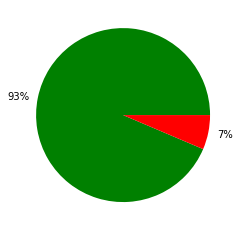

In [46]:
plt.pie(df_final['is_claim'].value_counts()/df_final.shape[0]*100,labels=['93%','7%'])
plt.show()

In [47]:
# Data is highly imbalanced

In [48]:
df_final['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [49]:
X = df_final.drop('is_claim',axis=1)
y= df_final['is_claim']

In [50]:
 #Data balancing using SMOTE
smote = SMOTE(sampling_strategy=0.7)
x_res,y_res =smote.fit_resample(X,y)

In [51]:
print(X.shape,y.shape,x_res.shape,y_res.shape)
print(y.value_counts())
print(y_res.value_counts())

(58592, 86) (58592,) (93234, 86) (93234,)
0    54844
1     3748
Name: is_claim, dtype: int64
0    54844
1    38390
Name: is_claim, dtype: int64


In [52]:
y_res.value_counts()/y_res.shape[0]*100

0    58.824034
1    41.175966
Name: is_claim, dtype: float64

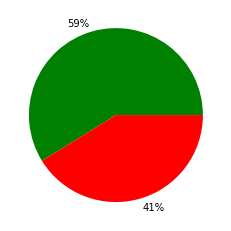

In [53]:
plt.pie(y_res.value_counts()/y_res.shape[0]*100,labels=['59%','41%'])
plt.show()

In [54]:
#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=10)

In [55]:
print(x_train.shape)
print(x_test.shape)

(74587, 86)
(18647, 86)


### Feature scaling

In [56]:
std = StandardScaler()

In [57]:
x_train_scl = std.fit_transform(x_train)
x_test_scl =std.transform(x_test)

In [58]:
print(x_train_scl.shape)
print(x_test_scl.shape)

(74587, 86)
(18647, 86)


In [59]:
x_train = pd.DataFrame(data=x_train_scl,columns=(x_train.columns))
x_test = pd.DataFrame(data=x_test_scl,columns=(x_test.columns))

## Machine learning Model building

### 1.Logistic regression

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

In [63]:
#Checking the model performance 

In [64]:
print(classification_report(y_train,y_train_predict_lr))
print(classification_report(y_test,y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71     43883
           1       0.54      0.30      0.38     30704

    accuracy                           0.61     74587
   macro avg       0.59      0.56      0.55     74587
weighted avg       0.59      0.61      0.58     74587

              precision    recall  f1-score   support

           0       0.62      0.82      0.71     10961
           1       0.54      0.29      0.38      7686

    accuracy                           0.60     18647
   macro avg       0.58      0.56      0.55     18647
weighted avg       0.59      0.60      0.57     18647



In [65]:
print(recall_score(y_test,y_test_predict_lr))
print(precision_score(y_test,y_test_predict_lr))

0.294951860525631
0.537841043890866


### 2.KNN

In [66]:
knn =KNeighborsClassifier()

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_train_predict_knn = knn.predict(x_train)
y_test_predict_knn = knn.predict(x_test)

In [69]:
#Checking the model performance 

In [70]:
print(classification_report(y_train,y_train_predict_knn))
print(classification_report(y_test,y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     43883
           1       0.78      0.91      0.84     30704

    accuracy                           0.86     74587
   macro avg       0.86      0.87      0.86     74587
weighted avg       0.87      0.86      0.86     74587

              precision    recall  f1-score   support

           0       0.87      0.74      0.80     10961
           1       0.70      0.85      0.77      7686

    accuracy                           0.79     18647
   macro avg       0.79      0.80      0.78     18647
weighted avg       0.80      0.79      0.79     18647



In [71]:
print(recall_score(y_test,y_test_predict_knn))
print(precision_score(y_test,y_test_predict_knn))

0.8481654957064794
0.6980404754256344


### 3.Naive bayes classifier

In [72]:
nvb =BernoulliNB()

In [73]:
nvb.fit(x_train,y_train)
y_train_predict_nvb = nvb.predict(x_train)
y_test_predict_nvb = nvb.predict(x_test)
#Checking the model performance 
print(classification_report(y_train,y_train_predict_nvb))
print(classification_report(y_test,y_test_predict_nvb))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63     43883
           1       0.47      0.48      0.48     30704

    accuracy                           0.57     74587
   macro avg       0.55      0.55      0.55     74587
weighted avg       0.57      0.57      0.57     74587

              precision    recall  f1-score   support

           0       0.63      0.62      0.63     10961
           1       0.47      0.47      0.47      7686

    accuracy                           0.56     18647
   macro avg       0.55      0.55      0.55     18647
weighted avg       0.56      0.56      0.56     18647



In [74]:
print(recall_score(y_test,y_test_predict_nvb))
print(precision_score(y_test,y_test_predict_nvb))

0.47397866250325266
0.4693982734183739


### 4.Support Vector Machine

In [75]:
svm = SVC()

In [76]:
svm.fit(x_train,y_train)

SVC()

In [77]:
y_train_predict_svm = svm.predict(x_train)
y_test_predict_svm = svm.predict(x_test)
#Checking the model performance
print(classification_report(y_train,y_train_predict_svm))
print(classification_report(y_test,y_test_predict_svm))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73     43883
           1       0.60      0.35      0.44     30704

    accuracy                           0.63     74587
   macro avg       0.62      0.59      0.58     74587
weighted avg       0.63      0.63      0.61     74587

              precision    recall  f1-score   support

           0       0.64      0.83      0.72     10961
           1       0.58      0.34      0.43      7686

    accuracy                           0.63     18647
   macro avg       0.61      0.58      0.58     18647
weighted avg       0.62      0.63      0.60     18647



In [78]:
print(recall_score(y_test,y_test_predict_svm))
print(precision_score(y_test,y_test_predict_svm))

0.34009888108248765
0.5806308307418925


### 5.Random forest classifier

In [79]:
rfc = RandomForestClassifier(criterion='entropy')

In [80]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [81]:
y_train_predict_rfc = rfc.predict(x_train)
y_test_predict_rfc = rfc.predict(x_test)

In [82]:
#Checking the model performance

In [83]:
print(classification_report(y_test,y_test_predict_rfc))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10961
           1       0.88      0.86      0.87      7686

    accuracy                           0.89     18647
   macro avg       0.89      0.89      0.89     18647
weighted avg       0.89      0.89      0.89     18647



In [84]:
print(recall_score(y_test,y_test_predict_rfc))
print(precision_score(y_test,y_test_predict_rfc))

0.856232110330471
0.8802835741037989


In [85]:
#Random forest classifier giving the best accuracy ,Trying to make result better by hyper parameter tuning

In [86]:
n_estimators= [50,150,200,250,300]
criterion=['gini','entropy']
max_depth=[20,25,30,35]
min_samples_split= [2,3,4]
min_samples_leaf= [1,2,3,4]

In [87]:
param = dict(n_estimators= [50,150,200,250,300],
             criterion=['gini','entropy'],
             max_depth=[20,25,30,35],
             min_samples_split= [2,3,4],
            min_samples_leaf= [1,2,3,4])

In [88]:
grcv = GridSearchCV(rfc,param,cv=10,n_jobs=-1)

In [89]:
#grcv.fit(x_train,y_train)

In [90]:
#Stopped as it is taking lot of time and excessive heating of laptop and laptop automatically restarting inbetween

In [91]:
from sklearn.model_selection import cross_val_score

# Initialize with whatever parameters you want to
clf = RandomForestClassifier()
# 10-Fold Cross validation
print (np.mean(cross_val_score(clf, X, y, cv=10)))

0.9309291355966464


### Variable importance

In [92]:
importac_idx = rfc.feature_importances_.argsort()
importac_idx

array([76, 17, 84, 13, 66, 30, 60, 10, 62, 83, 80, 71, 82, 78, 65, 57, 61,
       69, 67, 34, 25, 79, 33, 77, 68, 74, 23, 81, 70, 63, 24, 29, 85, 75,
       28,  8, 15, 27, 32, 58, 73, 31, 64, 11, 72, 26,  9, 59, 12, 16,  4,
        7, 47, 49, 44, 43, 48, 42, 35, 41, 14, 18, 20, 51, 22,  5, 19, 36,
       53,  6, 21, 38, 37, 45, 54, 40, 56, 39, 52, 50, 46, 55,  3,  2,  1,
        0], dtype=int64)

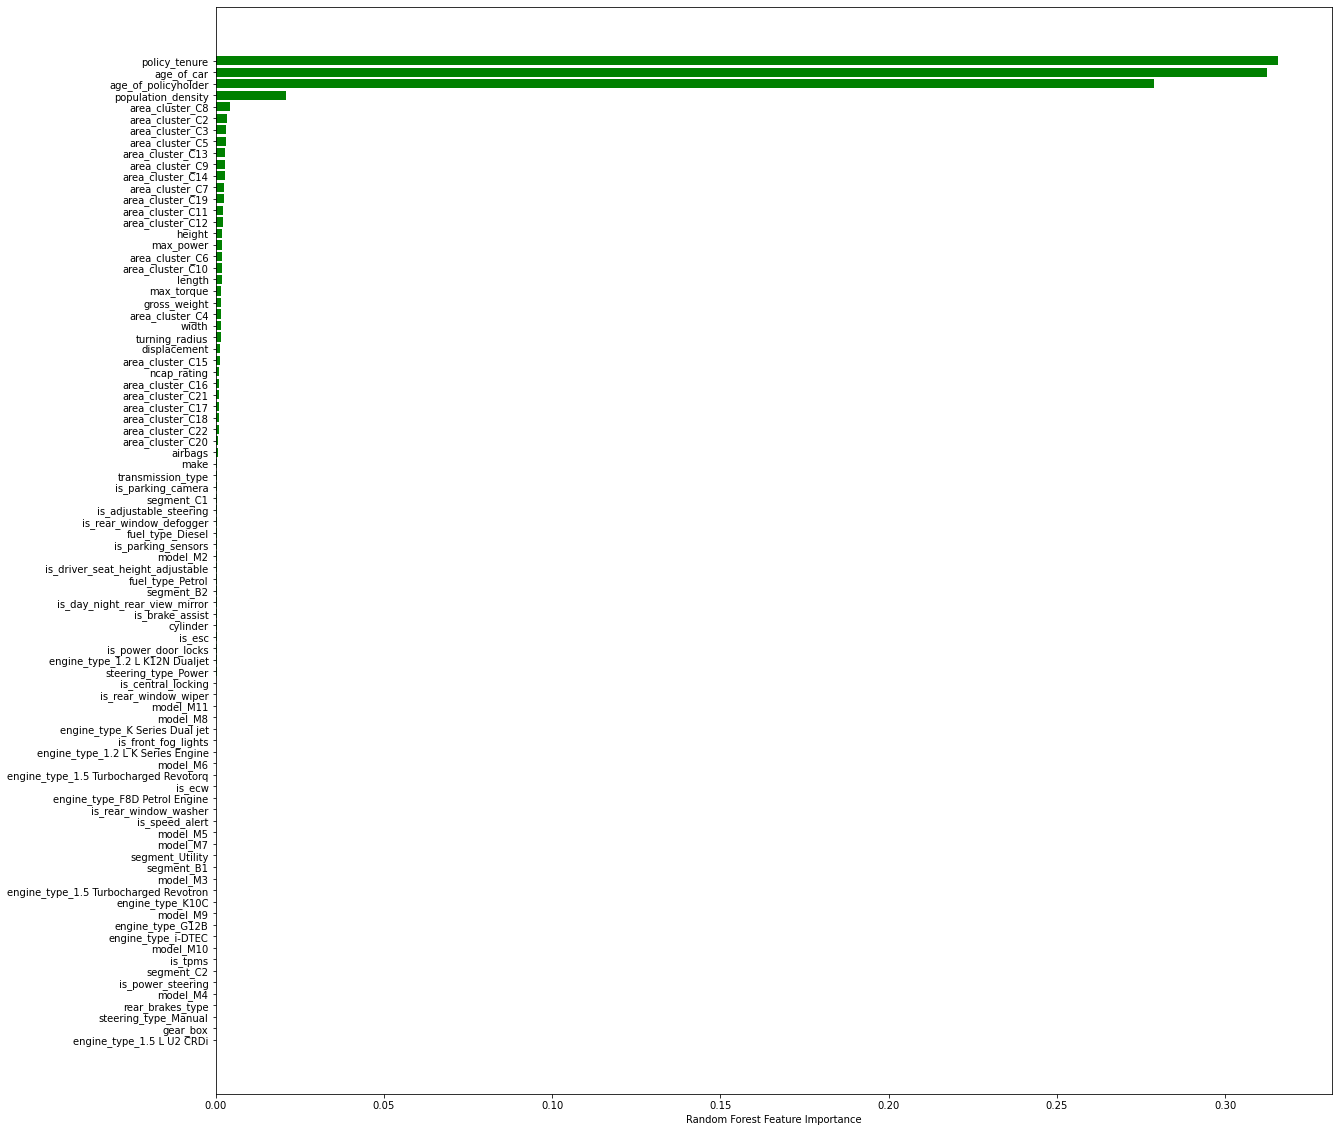

In [93]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns[importac_idx],rfc.feature_importances_[importac_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [94]:
x_train.columns[importac_idx][::-1][0:38]

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'area_cluster_C8', 'area_cluster_C2',
       'area_cluster_C3', 'area_cluster_C5', 'area_cluster_C13',
       'area_cluster_C9', 'area_cluster_C14', 'area_cluster_C7',
       'area_cluster_C19', 'area_cluster_C11', 'area_cluster_C12', 'height',
       'max_power', 'area_cluster_C6', 'area_cluster_C10', 'length',
       'max_torque', 'gross_weight', 'area_cluster_C4', 'width',
       'turning_radius', 'displacement', 'area_cluster_C15', 'ncap_rating',
       'area_cluster_C16', 'area_cluster_C21', 'area_cluster_C17',
       'area_cluster_C18', 'area_cluster_C22', 'area_cluster_C20', 'airbags',
       'make', 'transmission_type', 'is_parking_camera'],
      dtype='object')

In [95]:
x_train_impo = x_train[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'area_cluster_C8', 'area_cluster_C2',
       'area_cluster_C5', 'area_cluster_C3', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C9', 'area_cluster_C7',
       'area_cluster_C12', 'area_cluster_C19', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C6', 'width', 'turning_radius',
       'max_power', 'height', 'gross_weight', 'length', 'area_cluster_C4',
       'max_torque', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'displacement', 'area_cluster_C21', 'ncap_rating',
       'area_cluster_C18', 'area_cluster_C22', 'area_cluster_C20',
       'transmission_type', 'airbags', 'make', 'cylinder']]

In [96]:
x_test_impo =x_test[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'area_cluster_C8', 'area_cluster_C2',
       'area_cluster_C5', 'area_cluster_C3', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C9', 'area_cluster_C7',
       'area_cluster_C12', 'area_cluster_C19', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C6', 'width', 'turning_radius',
       'max_power', 'height', 'gross_weight', 'length', 'area_cluster_C4',
       'max_torque', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'displacement', 'area_cluster_C21', 'ncap_rating',
       'area_cluster_C18', 'area_cluster_C22', 'area_cluster_C20',
       'transmission_type', 'airbags', 'make', 'cylinder']]

In [97]:
x_train_impo.shape

(74587, 38)

In [98]:
y_train.shape

(74587,)

In [99]:
x_test_impo.shape

(18647, 38)

In [100]:
y_test.shape

(18647,)

In [101]:
rfc_impo = RandomForestClassifier( criterion='entropy')
rfc_impo.fit(x_train_impo,y_train)
y_train_predict_rfc_impo = rfc_impo.predict(x_train_impo)
y_test_predict_rfc_impo = rfc_impo.predict(x_test_impo)
print(classification_report(y_train,y_train_predict_rfc_impo))
print(classification_report(y_test,y_test_predict_rfc_impo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43883
           1       1.00      1.00      1.00     30704

    accuracy                           1.00     74587
   macro avg       1.00      1.00      1.00     74587
weighted avg       1.00      1.00      1.00     74587

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10961
           1       0.89      0.86      0.87      7686

    accuracy                           0.90     18647
   macro avg       0.90      0.89      0.89     18647
weighted avg       0.90      0.90      0.90     18647



In [102]:
# Model with feature imortance also giving the same accuracy

### 6.Stacking Classifier

In [103]:
lr_1 = LogisticRegression()
knn_1 =KNeighborsClassifier()
nvb_1 = BernoulliNB()
svm_1 = SVC()
dct_1 = DecisionTreeClassifier()
rfc_1 = RandomForestClassifier(criterion='entropy')


sclf = StackingClassifier(classifiers=[knn_1,nvb_1,svm_1,dct_1,rfc_1], meta_classifier=lr_1)

In [104]:
sclf.fit(x_train, y_train)


StackingClassifier(classifiers=[KNeighborsClassifier(), BernoulliNB(), SVC(),
                                DecisionTreeClassifier(),
                                RandomForestClassifier(criterion='entropy')],
                   meta_classifier=LogisticRegression())

In [105]:
y_pred_train_sclf = sclf.predict(x_train)
y_pred_test_sclf = sclf.predict(x_test)

In [106]:
print(classification_report(y_train,y_pred_train_sclf))
print(classification_report(y_test,y_pred_test_sclf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43883
           1       1.00      1.00      1.00     30704

    accuracy                           1.00     74587
   macro avg       1.00      1.00      1.00     74587
weighted avg       1.00      1.00      1.00     74587

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10961
           1       0.88      0.88      0.88      7686

    accuracy                           0.90     18647
   macro avg       0.90      0.90      0.90     18647
weighted avg       0.90      0.90      0.90     18647



In [107]:
print(recall_score(y_test,y_pred_test_sclf))
print(precision_score(y_test,y_pred_test_sclf))

0.880431954202446
0.8821535653760918


### Model evaluation 

In [108]:
#Confusion Matrix

In [116]:
con_mat = confusion_matrix(y_test,y_pred_test_sclf)
con_mat

array([[10057,   904],
       [  919,  6767]], dtype=int64)

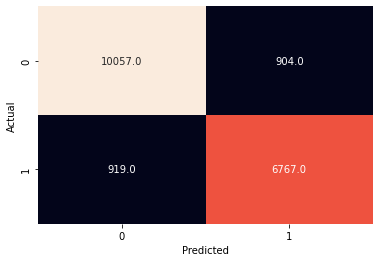

In [117]:
sns.heatmap(con_mat,annot=True,fmt='.1f',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [162]:
y_test_predict_sclf_parab =sclf.predict_proba(x_test)

In [164]:
y_test_predict_sclf_parab = y_test_predict_sclf_parab[:,1]

In [166]:
fpr,tpr,_ = roc_curve(y_test,y_test_predict_sclf_parab)

In [167]:
auc_score  = roc_auc_score(y_test,y_test_predict_sclf_parab)
auc_score

0.9565092906335554

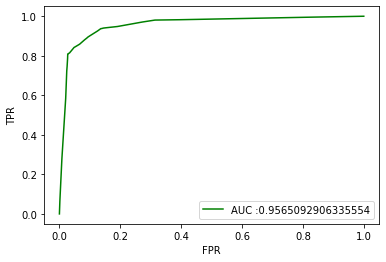

In [168]:
plt.plot(fpr,tpr,label = "AUC :"+str(auc_score))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

### ******************************************** END ***********************************************************

In [2]:
a = int(input('Enter the mobile number :'))

b = str(a)
if b == b[::-1]:
    print('It is a palindrom')
else:
    print('Not a palindrom')


Enter the mobile number :7598409963
Not a palindrom


In [7]:
n=0
mylist = []
while n <3:
    a = int(input("Enter the number: "))
    mylist.append(a)
    n=n+1
print(f'The maximum number : {max(mylist)}')
    

Enter the number: 3
Enter the number: 5
Enter the number: 7
The maximum number : 7
